## Part 1: Heart Failure Prediction

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [67]:
from sklearn.preprocessing import OneHotEncoder

#### Loading the dataset

In [68]:
df=pd.read_csv(r'../input/heart-failure-prediction/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#### Identifying features + target variables

In [69]:
# Target variable- HeartDisease

# FEATURES USED AFTER CHECKING FOR CORRELATION : All (other than HeartDisease) {since no correlated features detected}

In [70]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### EDA


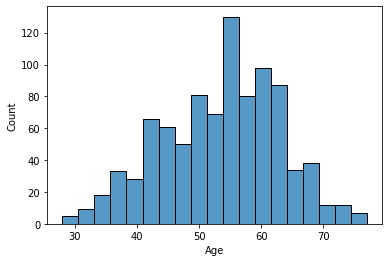

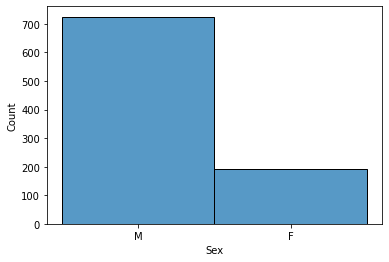

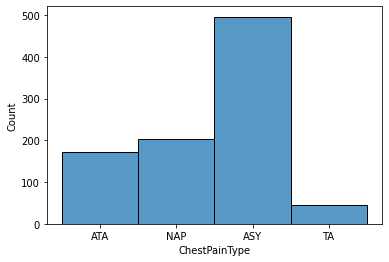

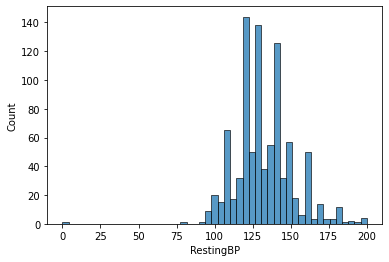

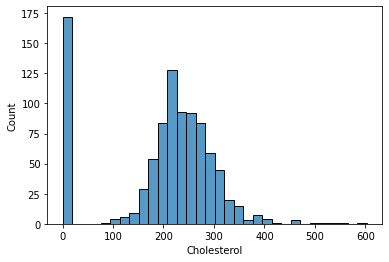

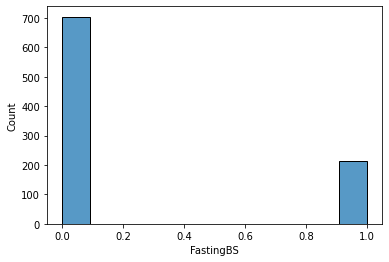

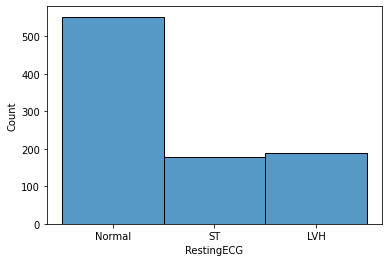

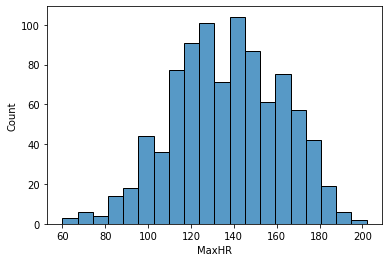

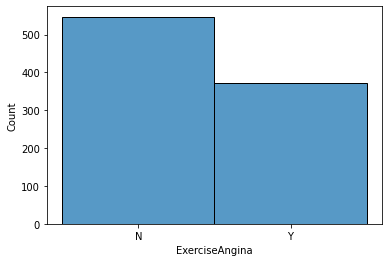

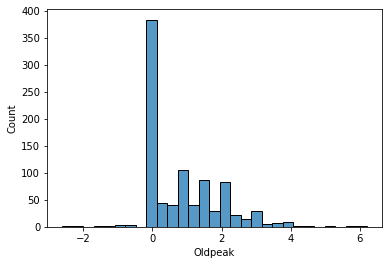

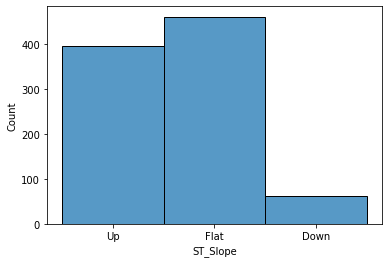

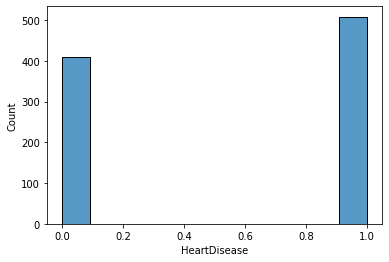

In [71]:
# univariate analysis
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Dropping duplicates

In [73]:
df.drop_duplicates(inplace=True)

#### Checking for missing values

In [74]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


##### Dropping those columns with NaN>60%

In [75]:
nan_cols = [i for i in df.columns if df[i].isnull().sum() > 0.6*918]
nan_cols                                                               # Here i dont find any col. with >60% na values
    

[]

#### Dropping null values

In [76]:
a=df.dropna()

In [77]:
a.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [78]:
a.shape

(918, 12)

In [79]:
a.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##**Preliminary observations**
1.  918 rows,12 cols
2.  no null values
3.  no duplicates
4.  7 discrete cols
5.  5 continuous cols

###*The dataset appears to be pretty clean*














### **Normalisation via Standard Scaling (applied only to numerical cols not categorical ones)**
A part of TASK 2

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
from sklearn.compose import ColumnTransformer

In [82]:
features = a[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]
ct = ColumnTransformer([
        ('somename', StandardScaler(),['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak'])
    ], remainder='passthrough')
d=ct.fit_transform(features)

In [83]:
dfa = pd.DataFrame(d)
dfa=dfa.drop([6,7,8,9,10],inplace=True)         # Thus dfa is our normalized dataframe


### ONE HOT ENCODING
A part of TASK 1

In [84]:
for col in a.columns:
    print(col,':',len(df[col].unique()),'labels')                           # checking for the no. of unique labels in each feature

Age : 50 labels
Sex : 2 labels
ChestPainType : 4 labels
RestingBP : 67 labels
Cholesterol : 222 labels
FastingBS : 2 labels
RestingECG : 3 labels
MaxHR : 119 labels
ExerciseAngina : 2 labels
Oldpeak : 53 labels
ST_Slope : 3 labels
HeartDisease : 2 labels


In [85]:
Hot_cols=a[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]          # cols for OneHot Enc.

In [86]:
for col in Hot_cols:                                                                  # looking up the unique labels for each categorical variable
    print(col,':',df[col].unique(),'labels')

Sex : ['M' 'F'] labels
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA'] labels
RestingECG : ['Normal' 'ST' 'LVH'] labels
ExerciseAngina : ['N' 'Y'] labels
ST_Slope : ['Up' 'Flat' 'Down'] labels


In [87]:
from sklearn.compose import make_column_transformer                                   # using make_column_transformer for OneHotEnc

In [88]:
col_trans=make_column_transformer(
    (OneHotEncoder(),['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']), #selectively performed OneHotEnc on only select columns using 1 hot transform
    remainder='passthrough')                             #ignore the remaining columns

In [89]:
df1=col_trans.fit_transform(Hot_cols)

In [90]:
df2=pd.DataFrame(df1)

In [91]:
df3=pd.concat([a,df2,dfa],axis=1)
df3

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,4,5,6,7,8,9,10,11,12,13
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [92]:
df3.shape

(918, 26)

In [93]:
df4=df3.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1)
df4=df4.drop(['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak'],axis=1)

In [94]:
df4.shape                                                              # our ready-to-go dataframe

(918, 15)

In [95]:
X=df4.drop('HeartDisease',axis=1)
y=df4['HeartDisease']

### Splitting dataset into train,test,split

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)    

# **TASK 1**

### **Implimenting Logistic regression**

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
logReg = LogisticRegression()

In [100]:
logReg.fit(X_train,y_train)

LogisticRegression()

#### Finding highly correlated features

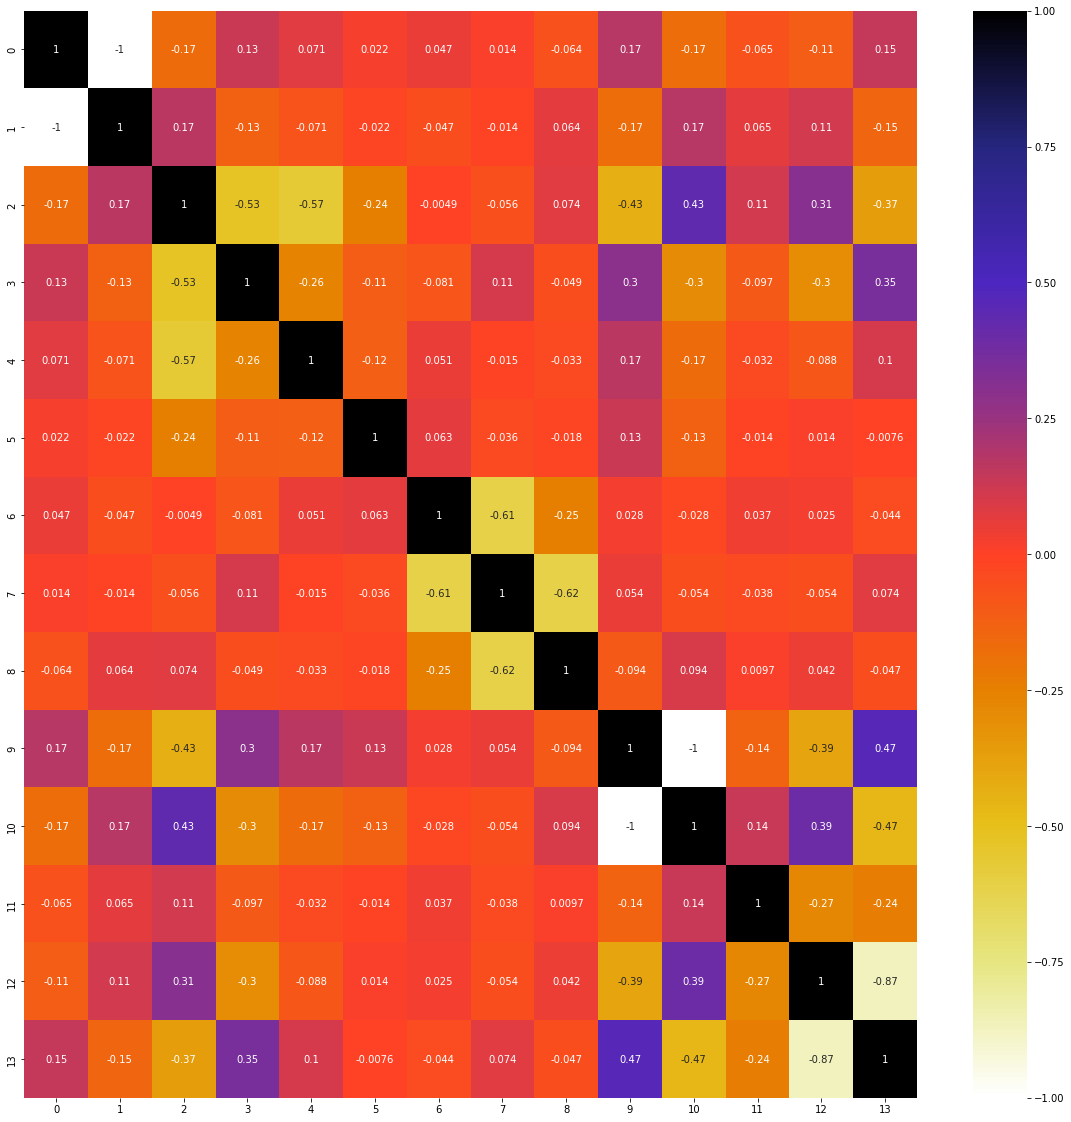

In [101]:
# Using Pearson correlation
plt.figure(figsize=(20,20))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

####**From the correlation matrix, it appears that none of the feature is highly correlated with any other feature of the dataset**

#### Predicting the score to find accuracy of predictions

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)           
n=logReg.score(X_test, y_test)
print(n)                                                                                               # 80-20 split


0.8043478260869565


In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)           # 70-30 split
print(logReg.score(X_test, y_test))                                                           
b=(1-n)*100
print('% error',b)

0.8115942028985508
% error 19.565217391304344


In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)           # 60-40 split
print(logReg.score(X_test, y_test))                                                           

0.8288043478260869


### Max score by 90-10 split

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)           # 90-10 split
print(logReg.score(X_test, y_test))

0.8369565217391305


# **TASK 2**

###**A) SVM**

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      # best score in 80-20 split

In [107]:
from sklearn.svm import SVC     # I tried changing values of C for a better score, best score when C=6
model1=SVC(C=6)

In [108]:
model1.fit(X_train,y_train)

SVC(C=6)

In [109]:
b=model1.score(X_test,y_test)                         
print(f'The best score is:{b}')                      

The best score is:0.8043478260869565


### **B) Decision trees**

In [110]:
X_train_dt, X_test_dt, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
model2=DecisionTreeClassifier(criterion='entropy')        # i tried with both gini,entropy, got better score with entropy
                                                          # tried changing the class wieght too, but default is best

In [113]:
model2.fit(X_train_dt,y_train)

DecisionTreeClassifier(criterion='entropy')

In [114]:
p=model2.score(X_test_dt, y_test)
print(f'The best score is:{p}')

The best score is:0.842391304347826


###**C) KNN Classification** (Since I want to try it out)

In [115]:
X_train_knn, X_test_knn, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [118]:
knn.fit(X_train_knn,y_train)

KNeighborsClassifier(n_neighbors=3)

In [119]:
knn.score(X_test_knn, y_test)

0.8369565217391305

# **TASK 3**

##**A) Random Forest Classifier**

####**Build random forest model with hyperparameters** 

In [120]:
n_estimators=[int(x) for x in np.linspace(start=10,stop=80,num=10)]  # no. of trees
max_features=['auto','sqrt']                                         # no. of features to consider at every split
max_depth=[2,4]                                                      # max levels in tree
min_samples_split=[2,5]                                              # min no. of samples required to split a node
min_samples_leaf=[1,2]                                               # min no. of samples required at each leaf node
bootstrap=[True,False]                                               # method of selecting samples for

In [121]:
# creating the param grid
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}

In [122]:
X_train_rf, X_test_rf, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

## **Hyperparameter tuning**

### **RandomizedSearchCV**

Since i have 918 dimensions (too many) thus i will go ahead with randomised search CV

In [123]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid=RandomizedSearchCV(estimator=rf_model,param_distributions=param_grid,cv=10,verbose=2,n_jobs=4)

In [124]:
rf_RandomGrid.fit(X_train_rf,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=56, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=72 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=72, total=   0.2s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=72 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=72, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_feat

[Parallel(n_jobs=4)]: Done  86 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.5s finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [125]:
rf_RandomGrid.best_params_

{'n_estimators': 25,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

In [126]:
z=rf_RandomGrid.score(X_test_rf, y_test)
print(f'The best score is:{z}')                          # Highest until now

The best score is:0.8967391304347826


###**GridSearchCV** 

For my own learning, I decided to perform GridSearch as well

In [127]:
from sklearn.model_selection import GridSearchCV
rf_Grid=GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=10,verbose=2,n_jobs=4)

In [128]:
rf_Grid.fit(X_train_rf,y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 320 candidates, totalling 3200 fits

[CV]  n_estimators=72, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, total=   0.1s
[CV] n_estimators=72, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 
[CV]  n_estimators=72, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, total=   0.1s
[CV] n_estimators=72, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 
[CV]  n_estimators=72, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, total=   0.1s
[CV] n_estimators=72, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 
[CV]  n_estimators=72, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, total=   0.1s
[CV] n_estimators=25, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_dept

[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    2.7s



[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True, total=   0.0s
[CV] n_estimators=72, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=False 
[CV]  n_estimators=72, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=False, total=   0.1s
[CV] n_estimators=72, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=False 
[CV]  n_estimators=72, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=False, total=   0.1s
[CV] n_estimators=72, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=False 
[CV]  n_estimators=72, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=False, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=2, max_featur

[Parallel(n_jobs=4)]: Done 576 tasks      | elapsed:   17.2s



[CV]  bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=80, total=   0.2s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.1s
[CV] bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  bootstrap=True, max_depth=2, max_features=sqr

[Parallel(n_jobs=4)]: Done 1388 tasks      | elapsed:   42.9s



[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=4, max_features=sqr

[Parallel(n_jobs=4)]: Done 2520 tasks      | elapsed:  1.2min



[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  bootstrap=False, max_depth=4, max_fea

[Parallel(n_jobs=4)]: Done 3193 out of 3200 | elapsed:  1.5min remaining:    0.2s
[Parallel(n_jobs=4)]: Done 3200 out of 3200 | elapsed:  1.5min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [129]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 48}

In [130]:
f=rf_Grid.score(X_test_rf, y_test)
print(f'The best score is:{f}')                          # same as in RandomisedSearch

The best score is:0.8967391304347826

[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=48, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=48 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=48, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=48 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=48, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=48 
[CV]  bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=48, total=   0.1s
[CV] bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=64 
[CV]  

### We tried:
1.  Logistic Regression (with different split ratios) [ highest score: 0.8369 {90-10 split} ]
2.  SVM [ score: 0.8043 ]
3.  Decision tree classifier [ 0.8423 ]
4.  KNN Classification [ 0.8369 ]
5.  Random Forest Classifier [ 0.8967 ] {with hyperparameter tuning via RandomizedSearchCV,GridSearchCV}
***So to put things in perspective, the highest score [0.8967] was obtained using Random Forest (that had been optimized via hyper-parameter tuning)***

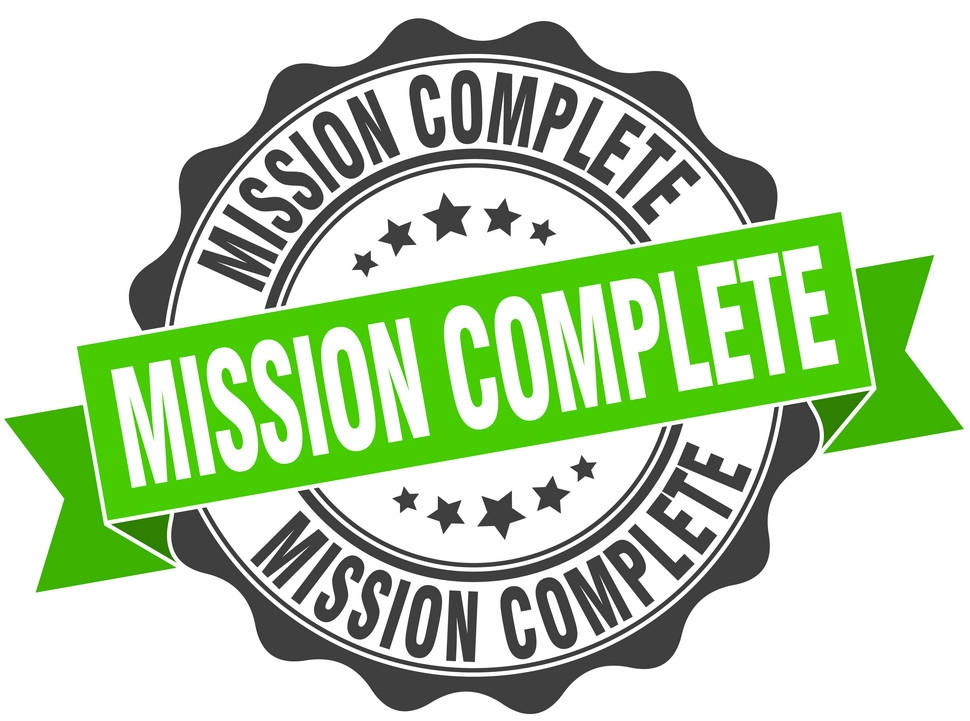